In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

from xgboost import XGBClassifier
import shap

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [4]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)

y_val_prob = model.predict_proba(X_val)[:, 1]

In [5]:
y_val_pred = (y_val_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall   :", recall_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("ROC AUC  :", roc_auc_score(y_val, y_val_prob))

Accuracy : 0.7467532467532467
Precision: 0.6415094339622641
Recall   : 0.6296296296296297
F1-score : 0.6355140186915887
ROC AUC  : 0.8275925925925927


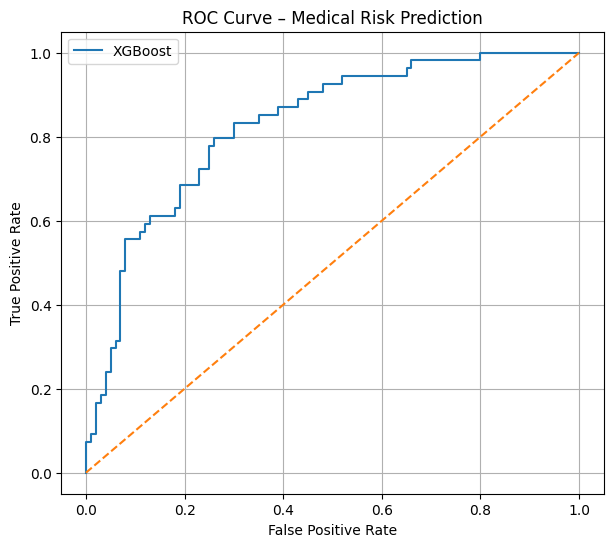

In [6]:
fpr, tpr, _ = roc_curve(y_val, y_val_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Medical Risk Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

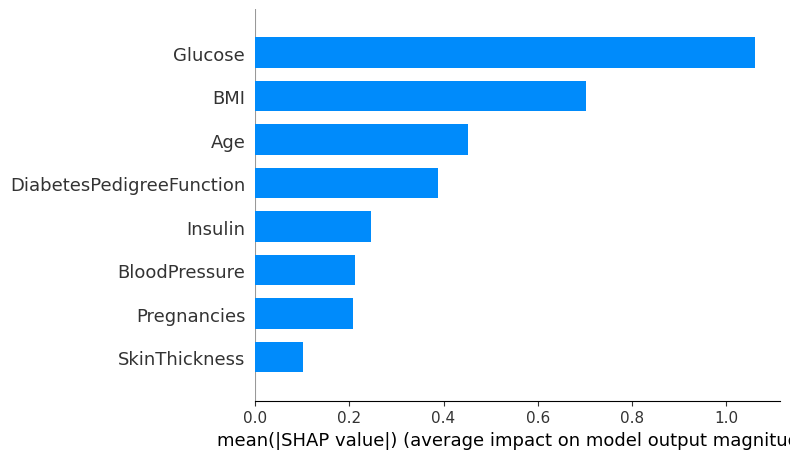

In [8]:
shap.summary_plot(shap_values, X_val, plot_type="bar")

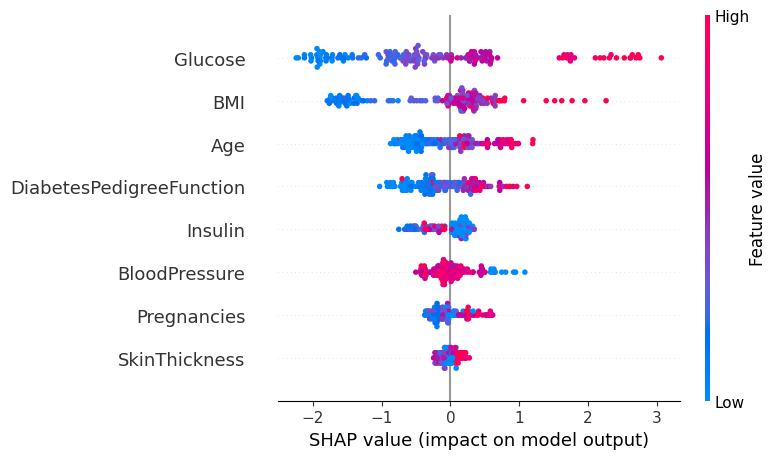

In [10]:
shap.summary_plot(shap_values, X_val)

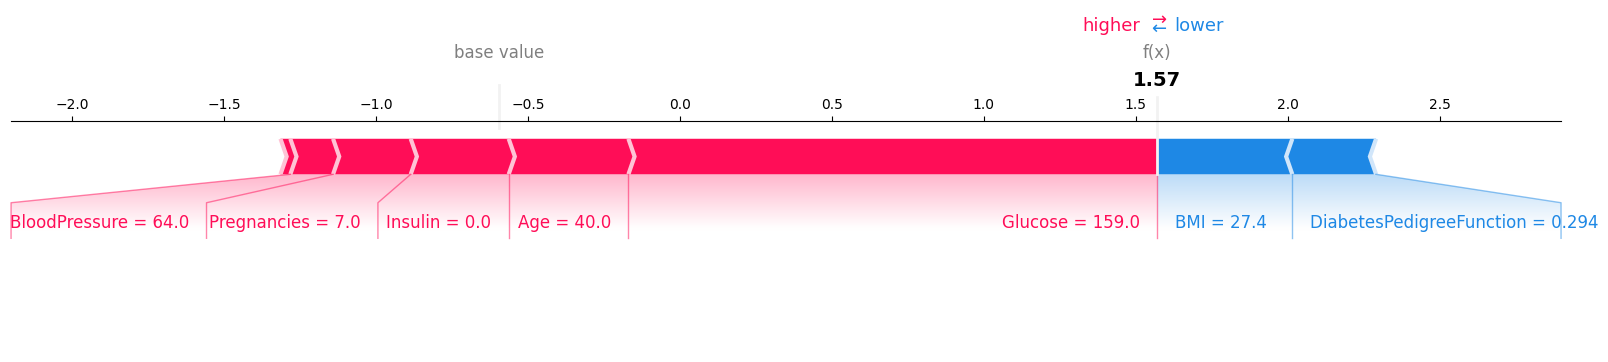

In [11]:
sample = X_val.iloc[[0]]

shap.force_plot(
    explainer.expected_value,
    explainer.shap_values(sample),
    sample,
    matplotlib=True
)